<a href="https://colab.research.google.com/github/Ayoubkassi/Twitter_Comercial_Segments/blob/main/Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install pycountry-convert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
from nltk.corpus import stopwords
import nltk
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pycountry_convert as pc

In [ ]:
import pandas as pd
df = pd.read_csv('iphone.csv')
df2 = pd.read_csv('iphone_users.csv')
df2.head()

,type,dateCreated,username,givenName,description,location,id,follows,friends,tweets
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ProfilePage,2021-02-02T17:34:13.000Z,_highestplus,H I G H E S T➕,NaN,"Madrid, Spain",1.356657e+18,17656.0,8439.0,9325.0
4,ProfilePage,2021-11-15T05:33:28.000Z,imparkerburton,Parker Burton,That Android Guy on TikTok,NaN,1.460119e+18,3507.0,112.0,655.0


In [ ]:
tweet = df['tweets']
tweet = tweet.dropna().reset_index()
tweet.head()

,index,tweets
0,0,Why you should buy a samsung and not an iphone
1,1,A new YELLOW iPhone 14 is reportedly coming ne...
2,2,Giving away brand new iPhone 13 and 13 mini t...
3,3,Bought a new iPhone
4,4,We are always here to give the best. \r\n\r\nW...


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
comments = []
stop_words = set(stopwords.words('english'))

for words in tweet['tweets']:
    only_letters = re.sub("[^a-zA-Z]", " ",str(words))
    tokens = nltk.word_tokenize(only_letters) #tokenize the sentences
    lower_case = [l.lower() for l in tokens] #convert all letters to lower case
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case)) #Remove stopwords from the comments
    comments.append(' '.join(filtered_result))
  


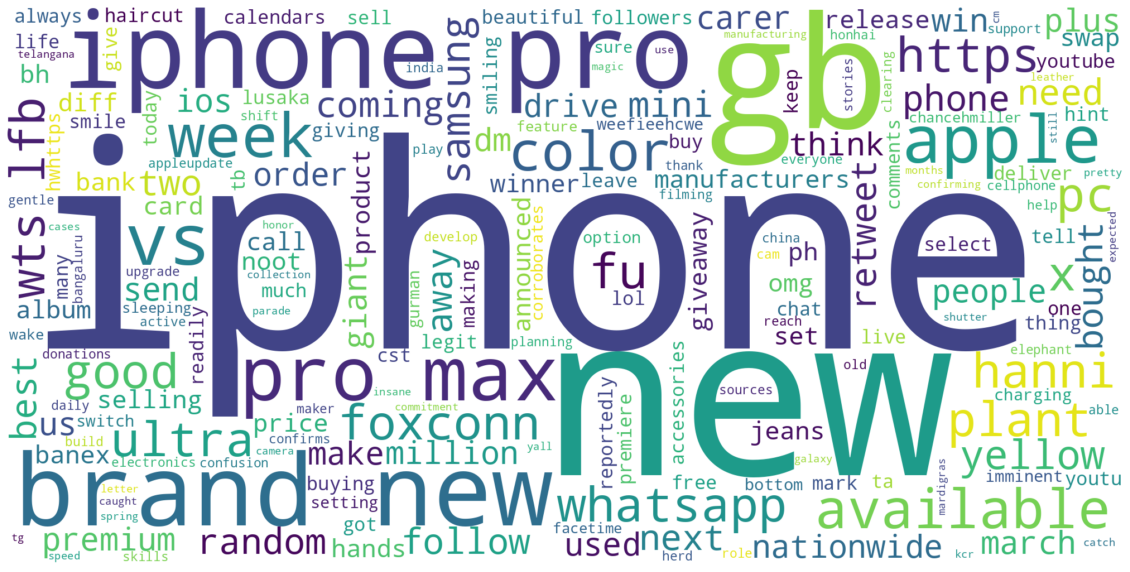

In [ ]:
#Using wordcloud to visualize the comments
unique_string=(" ").join(comments)
wordcloud = WordCloud(width = 2000, height = 1000,background_color='white').generate(unique_string)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('plot23.png', dpi=400, bbox_inches='tight')
plt.show()


In [66]:
import numpy as np

#extraction of the country 
def extract_country(location):
    if isinstance(location, str):
        split_loc = location.split(',')
        if len(split_loc) > 1:
            return split_loc[1].strip()
        else:
            return location.strip()
    else:
        return np.nan
df2['country'] = df2['location'].apply(extract_country)

df2 = df2[df2['country'].notna()]
df2.head()

,type,dateCreated,username,givenName,description,location,id,follows,friends,tweets,country
3,ProfilePage,2021-02-02T17:34:13.000Z,_highestplus,H I G H E S T➕,NaN,"Madrid, Spain",1.356657e+18,17656.0,8439.0,9325.0,Spain
6,ProfilePage,2021-09-20T21:59:59.000Z,TrillionaireJoe,Prophet of Prosperity 👑,"To register for my Mastermind, click here http...","Dubai, United Arab Emirates",1.440073e+18,2745.0,223.0,3796.0,United Arab Emirates
7,ProfilePage,2021-09-20T21:59:59.000Z,TrillionaireJoe,Prophet of Prosperity 👑,"To register for my Mastermind, click here http...","Dubai, United Arab Emirates",1.440073e+18,2745.0,223.0,3796.0,United Arab Emirates
8,ProfilePage,2022-11-10T11:59:57.000Z,pwinsrawr,Pwins,NaN,Calabarzon,1.590676e+18,2.0,4.0,250.0,Calabarzon
9,ProfilePage,2009-09-19T00:46:21.000Z,thecomputerclan,Computer Clan📌March 9,"If you like tech, you’ve come to the right pla...",NEXT EPISODE: March 9,7.543139e+07,16672.0,85.0,17999.0,NEXT EPISODE: March 9


In [67]:

def my_convert(row):
    try:
      cn_code = pc.country_name_to_country_alpha2(row.country, cn_name_format='default')
      conti_code = pc.country_alpha2_to_continent_code(cn_code)
      return conti_code
    except:
      return np.nan
df2['continent'] = df2.apply(my_convert, axis = 1)
df2.head()



,type,dateCreated,username,givenName,description,location,id,follows,friends,tweets,country,continent
3,ProfilePage,2021-02-02T17:34:13.000Z,_highestplus,H I G H E S T➕,NaN,"Madrid, Spain",1.356657e+18,17656.0,8439.0,9325.0,Spain,EU
6,ProfilePage,2021-09-20T21:59:59.000Z,TrillionaireJoe,Prophet of Prosperity 👑,"To register for my Mastermind, click here http...","Dubai, United Arab Emirates",1.440073e+18,2745.0,223.0,3796.0,United Arab Emirates,AS
7,ProfilePage,2021-09-20T21:59:59.000Z,TrillionaireJoe,Prophet of Prosperity 👑,"To register for my Mastermind, click here http...","Dubai, United Arab Emirates",1.440073e+18,2745.0,223.0,3796.0,United Arab Emirates,AS
8,ProfilePage,2022-11-10T11:59:57.000Z,pwinsrawr,Pwins,NaN,Calabarzon,1.590676e+18,2.0,4.0,250.0,Calabarzon,NaN
9,ProfilePage,2009-09-19T00:46:21.000Z,thecomputerclan,Computer Clan📌March 9,"If you like tech, you’ve come to the right pla...",NEXT EPISODE: March 9,7.543139e+07,16672.0,85.0,17999.0,NEXT EPISODE: March 9,NaN


In [68]:
df2.groupby('continent').size()

continent
AF    12
AS     8
EU     4
NA     9
dtype: int64

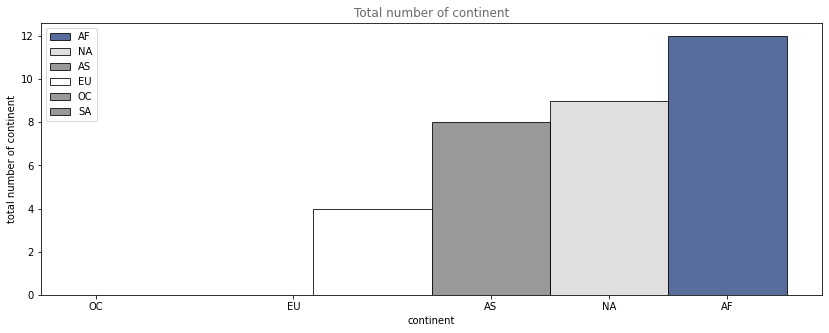

In [81]:
%matplotlib inline
plt.figure(figsize=(14,5))
plt.ylabel('total number of continent')
plt.xlabel('continent')
plt.title('Total number of continent',color='dimgrey')
plt.xticks([10,10.25,10.50,10.75,10.90,11.05],['SA','OC','EU','AS','NA','AF'])
#creating bar plots
plt.bar(11.05,12, color = '#2e4884', width = 0.15,alpha=0.8,label='AF',edgecolor='black')
plt.bar(10.90,9, color = '#d8d8d8', width = 0.15,alpha=0.8,label='NA',edgecolor='black')
plt.bar(10.75,8, color = 'grey', width = 0.15,alpha=0.8,label='AS',edgecolor='black')
plt.bar(10.60,4, color = 'white', width = 0.15,alpha=0.8,label='EU',edgecolor='black')
plt.bar(10.45,0,color = 'grey', width = 0.15,alpha=0.8,label='OC',edgecolor='black')
plt.bar(10.30,0, color = 'grey', width = 0.15,alpha=0.8,label='SA',edgecolor='black')


plt.legend()


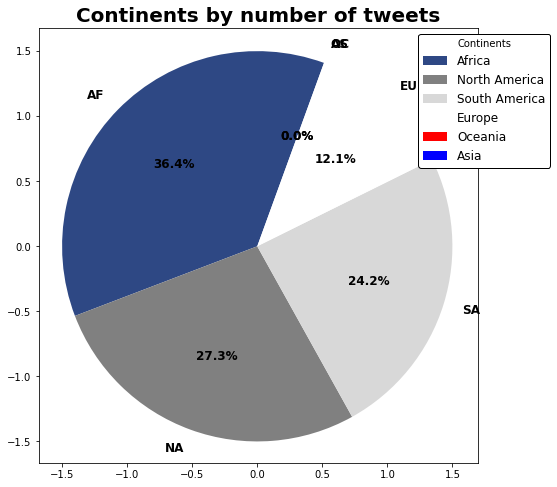

In [84]:

s = [12, 9, 8, 4, 0, 0]
new = ['AF', 'NA', 'SA', 'EU', 'OC', 'AS']
explode = (0, 0, 0, 0, 0, 0)

colors = ['#2e4884', 'grey', '#d8d8d8', 'w', 'r', 'b']

fig, ax = plt.subplots(figsize=(8, 8))
patches, texts, autotexts = ax.pie(s, explode=explode, labels=new,
                                   colors=colors,
                                   autopct='%1.1f%%',
                                   shadow=False,
                                   startangle=70,
                                   radius=1.5,
                                   frame=True,
                                   textprops={'fontsize': 12,
                                              'color': 'black',
                                              'weight': 'bold'})

# Add legend
legend_labels = ['Africa', 'North America', 'South America',
                 'Europe', 'Oceania', 'Asia']
legend_colors = [colors[i] for i in range(len(new))]
ax.legend(legend_labels, title="Continents", loc="upper left",
          bbox_to_anchor=(0.85, 1), fontsize=12,
          frameon=True, framealpha=1, fancybox=True, edgecolor="black",
          facecolor="white")

# Add title and subtitle
ax.set_title("Continents by number of tweets", fontsize=20, weight="bold")

# Set aspect ratio to be equal and display the chart
ax.set_aspect('equal')
plt.show()